In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('/content/Bank_customer_data.csv')

# Check for missing values
print(data.isnull().sum())

data.fillna(data.median(), inplace=True)

ID                    0
Age                   0
Experience            0
Income                0
Zipcode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


In [34]:
data.dropna(inplace=True)

# anomalous values

for col in ["Income", "CCAvg", "Mortgage"]:
    data = data[np.abs(data[col] - data[col].mean()) <= (3 * data[col].std())]

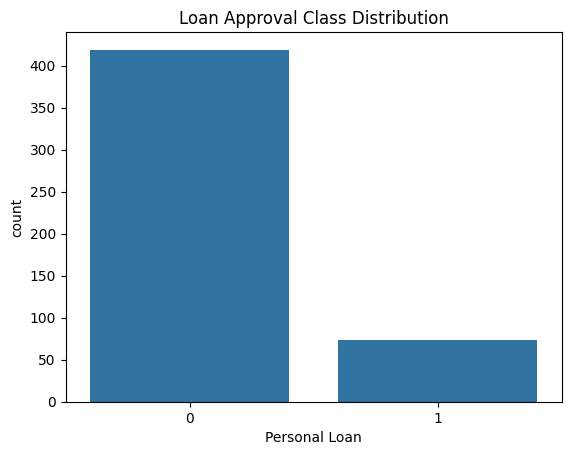

Personal Loan
0    0.851626
1    0.148374
Name: proportion, dtype: float64


In [35]:
# Handling Class Imbalance

sns.countplot(x=data["Personal Loan"])
plt.title("Loan Approval Class Distribution")
plt.show()

print(data["Personal Loan"].value_counts(normalize=True))  # Check class ratios

In [43]:
# Feature Engineering

data.drop(columns=["ID", "Zipcode"], errors="ignore", inplace=True)

print("Columns after dropping unnecessary features:", data.columns.tolist())

# Normalize/Standardize Numerical Features

scaler = StandardScaler()
numerical_features = ["Age", "Experience", "Income", "CCAvg", "Mortgage", "Family"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("First 5 rows of scaled numerical features:\n", data[numerical_features].head())


Columns after dropping unnecessary features: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
First 5 rows of scaled numerical features:
         Age  Experience    Income     CCAvg  Mortgage    Family
0 -0.056309   -0.102560  0.304636 -0.759754 -1.359408 -1.340022
1 -0.367592   -1.621772 -0.752216  1.251134  0.682051 -1.340022
2 -0.263831   -1.079197  0.688946 -0.877952  0.581651 -0.640138
3  1.603864   -1.187712  1.688152  1.203464  1.117116  0.759630
4  0.566256    0.222985  1.265411 -1.083333  1.237596 -1.340022


In [45]:
# Data Splitting

X = data.drop(columns=["Personal Loan"])  # Features
y = data["Personal Loan"]  # Target variable


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Shape: {X_train.shape}, Testing Shape: {X_test.shape}")


Training Shape: (393, 11), Testing Shape: (99, 11)
